# Síntese da segunda semana do terceiro experimento de Física Experimental V (Espectroscopia)

Grupo GD18

## Arranjo

O arranjo para esta etapa é idêntica com a da semana anterior, porém com a substituição da lâmpada de Mercúrio por uma lâmpada de hidrogênio e com a adição de uma lente focal entre a lâmpada e a fenda do arranjo

## Procedimentos

Procede-se de maneira similiar com a semana anterior, identificando-se as linhas de emissão do hidrogênio e anotando o passo e a cor na qual elas ocorrem convencionando-se o passo zero como sendo o da extrema-esquerda

Portanto a seguinte tabela relacionando os passos com a cor e intensidade das linhas:

<table>
    <tr></tr>
        <td>2700 (vermelho, quase ruído)</td>
        <td>5400 (vermelho, intenso)</td>
        <td>5900 (vermelho, quase ruído)</td>
        <td>7700 (vermelho, fraco)</td>
        <td>8600 (vermelho, quase ruído)</td>
        <td></td>
    <tr></tr>
    <tr></tr>
        <td>15500 (azul, intenso)</td>
        <td>17500 (azul, quase ruído)</td>
        <td>17700 (azul, fraco)</td>
        <td>18200 (azul, moderado)</td>
        <td>19500 (azul, moderado)</td>
    <tr></tr>    
</table>

Feito isso, é adquirido o espectro do hidrogênio no intervalo entre 2000 e 22000

## Resultados

O espectro obtido para o hidrogênio é ilustrada pela figura no bloco seguinte, que ilustra o logaritmo da intensidade pelo número de passos:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


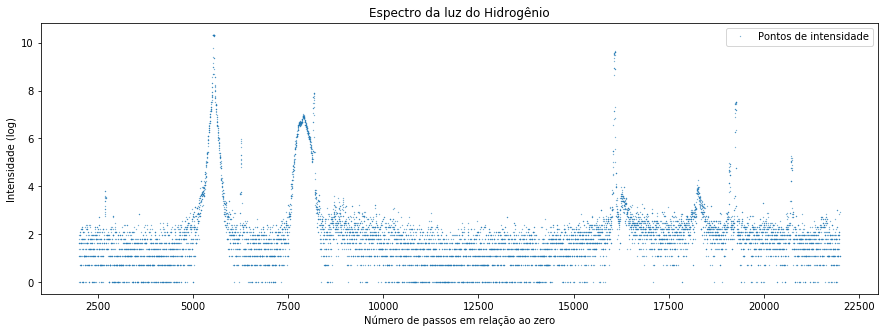

In [11]:
# Dependências
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sig
import scipy.optimize as opt
import os
plt.rcParams["figure.figsize"] = (15, 5)

# Caminho para o arquivo.csv com os dados
data_path = os.path.expanduser("Sem2/espectro_hidrogenio.csv")

# Carregar os dados
data = pd.read_csv(data_path, delimiter=";")
X = data.Passo
Y = np.log(data.Intensidade)

# Exibir os resultados
plt.plot(X, Y, '.', markersize=0.5, label="Pontos de intensidade")
#plt.plot(X, Y, '-', linewidth=0.1, label="Interpolação linear")
plt.title("Espectro da luz do Hidrogênio")
plt.ylabel("Intensidade (log)")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

## Análise

Utilizando-se do espectro, é possível obter os passos para os picos das linhas de emissão

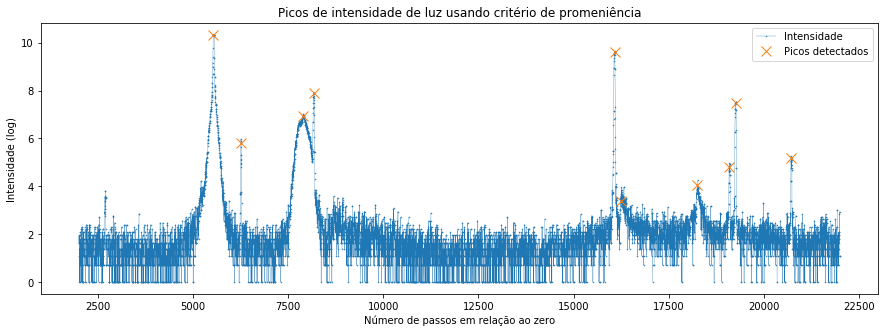

In [12]:
# Aquisição de picos pela promeniência

n = 30
Yp = Y
Xp = X.rolling(n).max()[n:]
Yp = Y.rolling(n).max()[n:]
i_peaks = sig.find_peaks(Yp, prominence=1, distance=10, width=10)[0]
X_peaks = X[i_peaks + n/2]
Y_peaks = Y[i_peaks + n/2]

plt.plot(X, Y, '.-', linewidth=0.3, markersize=1)
plt.plot(X_peaks, Y_peaks, 'x', markersize=10, label="Picos detectados")
plt.title("Picos de intensidade de luz usando critério de promeniência")
plt.ylabel("Intensidade (log)")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

Para fins de análise, somente serão selecionados os picos nas proximidades dos passos 5000, 15500, 18500 e 21000 por este serem as linhas mais intensas durante a tomada de dados

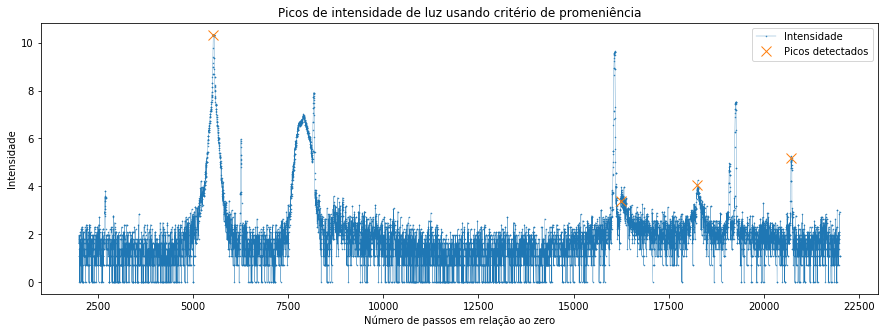

In [13]:
# Seleção dos picos
X_peaks_a = X_peaks.values[[0, 5, 6, 9]]
Y_peaks_a = Y_peaks.values[[0, 5, 6, 9]]

plt.plot(X, Y, '.-', linewidth=0.3, markersize=1)
plt.plot(X_peaks_a, Y_peaks_a, 'x', markersize=10, label="Picos detectados")
plt.title("Picos de intensidade de luz usando critério de promeniência")
plt.ylabel("Intensidade")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

Com a calibração da lâmpada de hidrogênio, é possível associar comprimentos de ondas para as linhas de emissão do hidrogênio:

In [14]:
import uncertainties as unc
import uncertainties.unumpy as unp
nom_val = [-1.51824081e-01,  7.28583053e+03]
cov_mtr = [[ 1.95225979e-05, -2.48451089e-01], [-2.48451089e-01,  2.84241995e+03]]
(a, b) = unc.correlated_values(nom_val, cov_mtr)

In [15]:
X_ang = a * X + b
X_peaks_ang = a * X_peaks_a + b

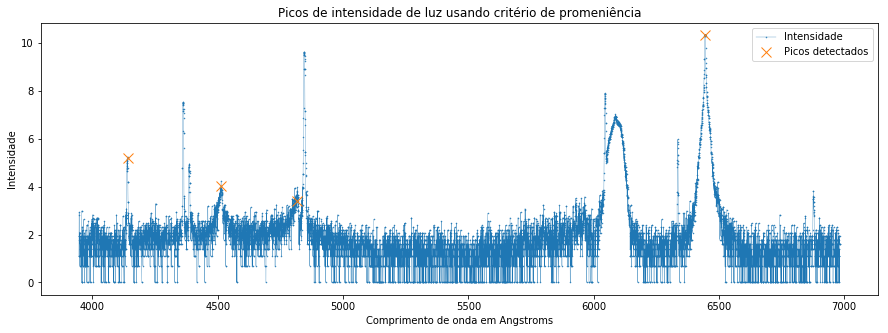

In [16]:
plt.plot(unp.nominal_values(X_ang), Y, '.-', linewidth=0.3, markersize=1)
plt.plot(unp.nominal_values(X_peaks_ang), Y_peaks_a, 'x', markersize=10, label="Picos detectados")
plt.title("Picos de intensidade de luz usando critério de promeniência")
plt.ylabel("Intensidade")
plt.xlabel("Comprimento de onda em Angstroms")
plt.legend()
plt.show()

Com isso, obtemos os valores de comprimento de onda para algumas das linhas de emissão do hidrogênio

In [17]:
for (i, val) in enumerate(X_peaks_ang):
    print("Linha {}: {:.-1f} Angstroms".format(i+1, val))

Linha 1: 6445+/-28 Angstroms
Linha 2: 4818+/-22 Angstroms
Linha 3: 4514+/-32 Angstroms
Linha 4: 4141+/-43 Angstroms


Para identificar os números quânticos, é inspecionado o comprimento de onda de um diagrama de linhas espectrais do hidrogênio:

![Linhas Espectrais do Hidrogenio](http://eilat.sci.brooklyn.cuny.edu/cis1_5/Old%20HWs/HW2d_C_files/image002.jpg)

Nota-se que o resultado obtido indica que adquirimos a luz das transições de n: 2->3, 2->4, 2->5 e 2->6, correspondendo as três primeiras emissões da Série de Ballmer

Ao ajustar o comprimento de onda na fórmula de Rydberg identificando-se os números quânticos para cada comprimento, obtém-se a constante de Rydberg:

$\frac{1}{\lambda} = (\frac{1}{n_1^2} - \frac{1}{n_2^2}) R + CL$

In [18]:
diff_sq = [(1/4 - 1/9), (1/4 - 1/16), (1/4 - 1/25), (1/4 - 1/36)]

In [19]:
import scipy.optimize as opt
y_aj = 1 / (X_peaks_ang * 1e-10)
y = unp.nominal_values(y_aj)
sy = unp.std_devs(y_aj)
x = np.array(diff_sq)
cf = opt.curve_fit(lambda x, c, d: c * x + d, x, y, sigma=sy)

(R, CL) = unc.correlated_values(cf[0], cf[1])
print("Número de Reinolds : {} m⁻¹, Coeficiente Linear: {} m⁻¹".format(R, CL))

Número de Reinolds : (1.01+/-0.06)e+07 m⁻¹, Coeficiente Linear: (1.5+/-1.0)e+05 m⁻¹


Nota-se que o número de Reinolds é compatível com o esperado pela literatura ($R=1.09 * 10^7 m^{-1}$) e que o coeficiente linear obtido é compatível como sendo nulo, ambos os resultados dentro de $2 \sigma$

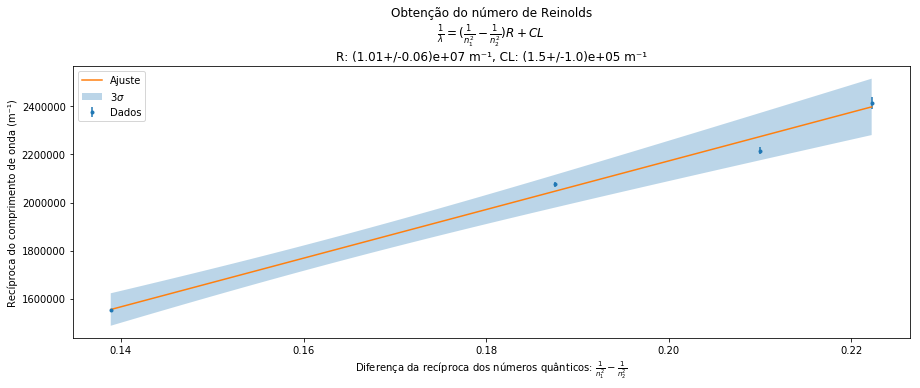

In [20]:
x_fit = np.linspace(np.min(x), np.max(x), 100)
y_fit = x_fit * R + CL
y_fit_n = unp.nominal_values(y_fit)
y_fit_s = 3 * unp.std_devs(y_fit)
plt.errorbar(x, y, yerr=sy, label="Dados", fmt=".")
plt.plot(x_fit, y_fit_n, label="Ajuste")
plt.fill_between(x_fit, y_fit_n - y_fit_s, y_fit_n + y_fit_s, alpha=0.3, label=r"$3\sigma$")

title_text = "Obtenção do número de Reinolds"
title_text += "\n"
title_text += r"$\frac{1}{\lambda} = (\frac{1}{n_1^2} - \frac{1}{n_2^2}) R + CL$"
title_text += "\nR: {} m⁻¹, CL: {} m⁻¹".format(R, CL)
plt.title(title_text)
plt.ylabel(r"Recíproca do comprimento de onda (m⁻¹)")
plt.xlabel(r"Diferença da recíproca dos números quânticos: $\frac{1}{n_1^2} - \frac{1}{n_2^2}$")
plt.legend()
plt.show()